In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

from sklearn import datasets

Load dataset

In [34]:
iris = datasets.load_iris()

In [35]:
df = pd.DataFrame(data = iris['data'], columns = iris['feature_names'])
df['target'] = iris['target']

Check data structure

In [36]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [38]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

Define features and target

In [39]:
x = df[df.columns.drop(['target'])]
y = df['target']

Check features correlation

<Axes: >

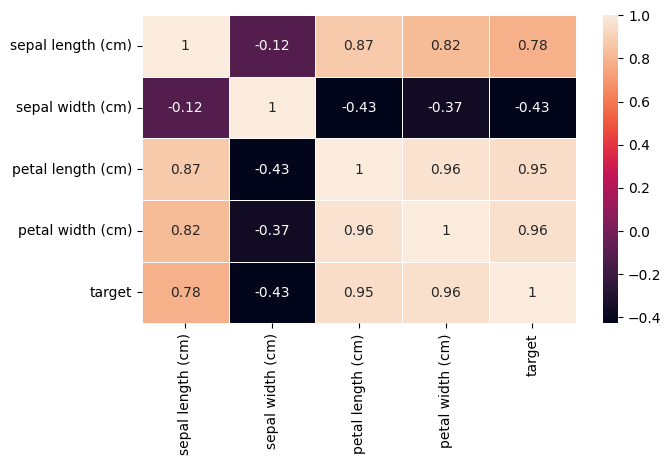

In [40]:
corr = df.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(7, 4))
sns.heatmap(corr, annot=True, linewidths=.5)

We can see that petal length and petal width and sepal length are highly correlated, but for now let's leave all the features

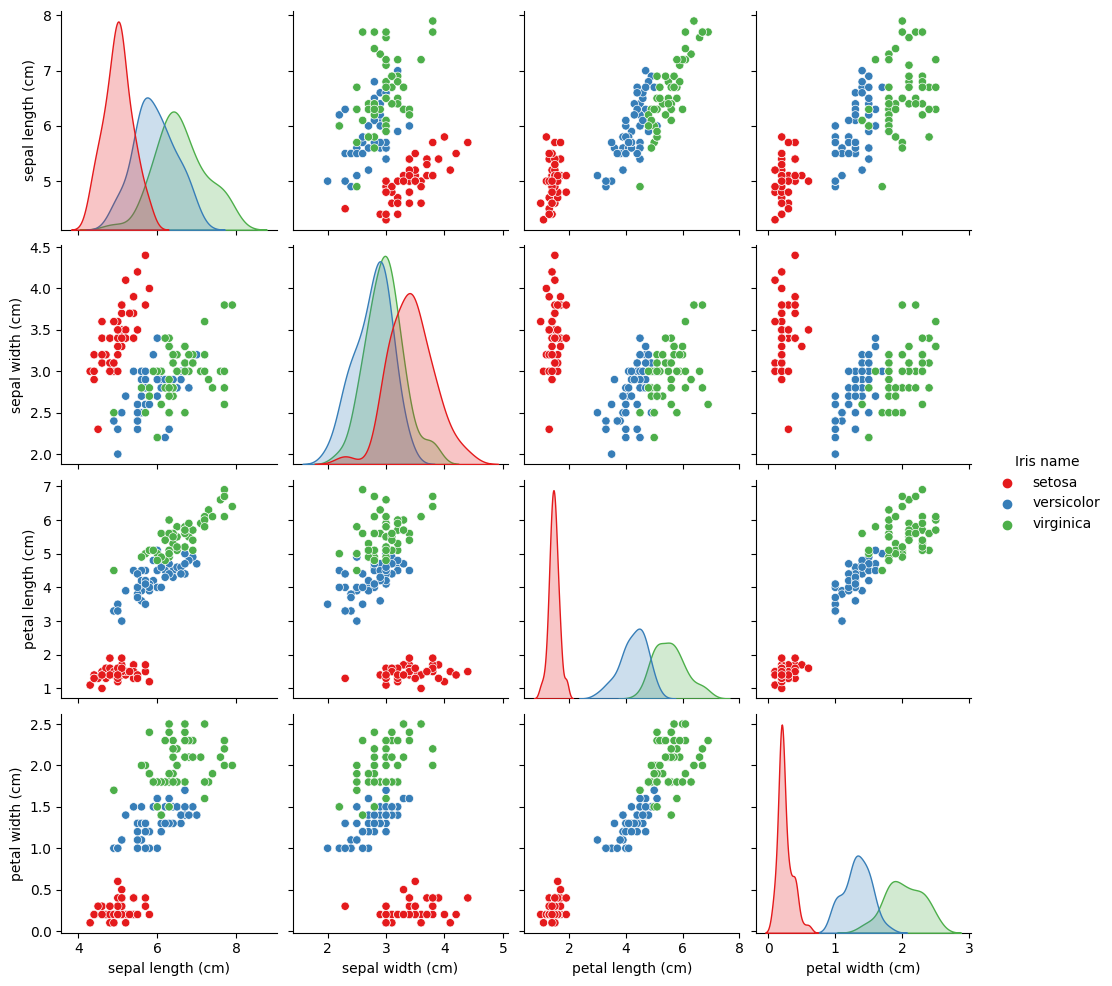

In [41]:
df['Iris name'] = df['target'].apply(lambda x: 'setosa' if x == 0 else ('versicolor' if x == 1 else 'virginica'))
sns.pairplot(df, hue = 'Iris name', vars = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'], palette = 'Set1' );

Split data to train and test

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle=True, test_size=0.2)

Train model using grid search

In [43]:
#create basic model
mod = SVC()

#define parameters for grid search
params = {'kernel':['linear', 'poly'],
         'degree':[2,3,4,5]
         }

#create model for grid search
mod_grid = GridSearchCV(mod,
                       params,
                       cv=5,
                       scoring='accuracy')

#train model with grid search
mod_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'degree': [2, 3, 4, 5], 'kernel': ['linear', 'poly']},
             scoring='accuracy')

In [44]:
#look for best estimator
mod_grid.best_estimator_

SVC(degree=2, kernel='linear')

check model on test

In [45]:
preds = mod_grid.best_estimator_.predict(x_test)
print(accuracy_score(y_test, preds))
print(confusion_matrix(y_test, preds))
print(f1_score(y_test, preds, average='micro'))

1.0
[[ 8  0  0]
 [ 0 11  0]
 [ 0  0 11]]
1.0


We can see that SVC model with parameters (degree=2, kernel='linear') can split the model without errors.